In [52]:
import fastf1
import pandas as pd
import seaborn as sns
import matplotlib as plt

session_fp1 = fastf1.get_session(2025, 'Canada', 'FP1')

In [11]:
# load the FP1 data
session_fp1.load()

core           INFO 	Loading data for Canadian Grand Prix - Practice 1 [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '5', '6', '10', '12', '14', '16', '18', 

In [21]:
# create a dataframe for all the FP1 data 
# these are the columns we will be working with
laps_columns_to_keep = [
    "LapTime",
    "LapStartTime",
    "TyreLife",
    "SpeedI1",
    "SpeedI2",
    "SpeedFL",
    "Compound",
    "IsAccurate",
    "Driver",
    "Stint",
    "TrackStatus"
]

laps1 = session_fp1.laps.copy()
laps_fp1 = laps1[laps_columns_to_keep]
laps_fp1


,LapTime,LapStartTime,TyreLife,SpeedI1,SpeedI2,SpeedFL,Compound,IsAccurate,Driver,Stint,TrackStatus
0,0 days 00:01:40.099000,0 days 00:15:30.753000,1.0,249.0,268.0,286.0,SOFT,False,VER,1.0,12
1,0 days 00:01:16.067000,0 days 00:17:07.002000,2.0,253.0,277.0,286.0,SOFT,True,VER,1.0,1
2,0 days 00:02:16.828000,0 days 00:18:23.069000,3.0,103.0,154.0,288.0,SOFT,True,VER,1.0,1
3,0 days 00:01:14.478000,0 days 00:20:39.897000,4.0,257.0,280.0,289.0,SOFT,True,VER,1.0,1
4,0 days 00:02:05.872000,0 days 00:21:54.375000,5.0,110.0,213.0,290.0,SOFT,True,VER,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
545,0 days 00:01:22.262000,0 days 01:10:31.357000,13.0,248.0,194.0,269.0,SOFT,True,BEA,4.0,1
546,0 days 00:01:17.377000,0 days 01:11:53.619000,14.0,253.0,277.0,273.0,SOFT,True,BEA,4.0,1
547,0 days 00:01:16.793000,0 days 01:13:10.996000,15.0,NaN,276.0,275.0,SOFT,True,BEA,4.0,1
548,0 days 00:02:03.949000,0 days 01:14:27.789000,16.0,152.0,249.0,80.0,SOFT,True,BEA,4.0,1


In [22]:
# we also need the weather data for the extensive analysis 
weather_columns_to_keep = [
    "Time",
    "TrackTemp"
]

weather1 = session_fp1.weather_data.copy()
weather_fp1 = weather1[weather_columns_to_keep]
# sd weather_fp1

,Time,TrackTemp
0,0 days 00:00:35.985000,41.4
1,0 days 00:01:36.019000,41.4
2,0 days 00:02:36.014000,41.4
3,0 days 00:03:36.014000,41.4
4,0 days 00:04:36.002000,41.4
...,...,...
75,0 days 01:15:36.122000,43.8
76,0 days 01:16:36.129000,44.0
77,0 days 01:17:36.129000,44.0
78,0 days 01:18:36.136000,44.0


In [23]:
laps_fp1['LapStartTime'] = pd.to_timedelta(laps_fp1['LapStartTime'])
weather_fp1['Time'] = pd.to_timedelta(weather_fp1['Time'])

/var/folders/bc/_h0z1r_n7xsczt7nbblx6sxr0000gn/T/ipykernel_69761/1065818909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps_fp1['LapStartTime'] = pd.to_timedelta(laps_fp1['LapStartTime'])
/var/folders/bc/_h0z1r_n7xsczt7nbblx6sxr0000gn/T/ipykernel_69761/1065818909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_fp1['Time'] = pd.to_timedelta(weather_fp1['Time'])


In [24]:
laps_fp1 = laps_fp1.sort_values('LapStartTime')
weather_fp1 = weather_fp1.sort_values('Time')

In [25]:
merged_fp1 = pd.merge_asof(
    laps_fp1,
    weather_fp1,
    left_on='LapStartTime',
    right_on='Time',
    direction='backward'
)

In [29]:
merged_fp1.head(100)

,LapTime,LapStartTime,TyreLife,SpeedI1,SpeedI2,SpeedFL,Compound,IsAccurate,Driver,Stint,TrackStatus,Time,TrackTemp
0,NaT,0 days 00:14:10.222000,1.0,226.0,248.0,264.0,SOFT,False,OCO,1.0,1,0 days 00:13:36.065000,41.2
1,NaT,0 days 00:14:19.847000,1.0,178.0,256.0,256.0,SOFT,False,PIA,1.0,1,0 days 00:13:36.065000,41.2
2,NaT,0 days 00:14:22.440000,1.0,208.0,253.0,NaN,MEDIUM,False,HUL,1.0,12,0 days 00:13:36.065000,41.2
3,0 days 00:01:41.211000,0 days 00:14:23.675000,1.0,233.0,257.0,281.0,SOFT,False,HAM,1.0,1,0 days 00:13:36.065000,41.2
4,0 days 00:01:46.560000,0 days 00:14:31.331000,1.0,187.0,250.0,279.0,SOFT,False,COL,1.0,1,0 days 00:13:36.065000,41.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0 days 00:01:16.927000,0 days 00:22:52.711000,6.0,256.0,279.0,250.0,MEDIUM,True,BOR,1.0,1,0 days 00:22:36.088000,42.2
96,0 days 00:01:15.081000,0 days 00:22:59.310000,6.0,257.0,278.0,289.0,SOFT,True,NOR,2.0,1,0 days 00:22:36.088000,42.2
97,0 days 00:01:54.068000,0 days 00:23:02.678000,5.0,148.0,149.0,288.0,SOFT,True,SAI,1.0,1,0 days 00:22:36.088000,42.2
98,0 days 00:01:53.469000,0 days 00:23:05.975000,3.0,224.0,257.0,280.0,SOFT,False,OCO,2.0,1,0 days 00:22:36.088000,42.2


In [40]:
merged_fp1["LapStartTime_s"] = merged_fp1["LapStartTime"].dt.total_seconds()
merged_fp1 = merged_fp1.drop(columns=["LapStartTime", "Time"])


KeyError: 'LapStartTime'

In [41]:
clean_fp1 = merged_fp1[
    (merged_fp1["IsAccurate"] == True) &
    (merged_fp1["LapTime"].notna()) &
    (merged_fp1["SpeedFL"].notna()) 
]

In [45]:
clean_fp1["LapTime_s"] = clean_fp1["LapTime"].dt.total_seconds()
clean_fp1 = clean_fp1.drop(columns=["LapTime"])

/var/folders/bc/_h0z1r_n7xsczt7nbblx6sxr0000gn/T/ipykernel_69761/3397990633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_fp1["LapTime_s"] = clean_fp1["LapTime"].dt.total_seconds()


In [48]:
desired_order = ["Driver", "Stint", "Compound", "TyreLife", "LapStartTime_s", 
                 "LapTime_s", "TrackTemp", "TrackStatus", "SpeedFL", 
                 "SpeedI1", "SpeedI2"]
clean_fp1 = clean_fp1[desired_order]

In [49]:
clean_fp1

,Driver,Stint,Compound,TyreLife,LapStartTime_s,LapTime_s,TrackTemp,TrackStatus,SpeedFL,SpeedI1,SpeedI2
16,HAM,1.0,SOFT,2.0,962.627,77.018,41.6,12,286.0,255.0,278.0
18,COL,1.0,SOFT,2.0,974.454,110.712,41.6,12,281.0,233.0,258.0
19,LAW,1.0,MEDIUM,2.0,980.014,81.084,41.6,12,281.0,248.0,273.0
20,NOR,1.0,SOFT,2.0,987.243,81.371,41.6,21,283.0,254.0,276.0
21,GAS,1.0,SOFT,2.0,989.937,90.493,41.6,21,282.0,198.0,256.0
...,...,...,...,...,...,...,...,...,...,...,...
526,NOR,4.0,SOFT,14.0,4495.994,137.853,43.8,1,124.0,195.0,162.0
528,COL,4.0,SOFT,14.0,4504.916,147.119,43.8,1,174.0,197.0,188.0
529,HUL,7.0,SOFT,9.0,4506.320,140.218,43.8,1,164.0,219.0,235.0
530,ANT,5.0,SOFT,10.0,4506.679,148.354,43.8,1,186.0,176.0,233.0


AttributeError: module 'matplotlib' has no attribute 'title'

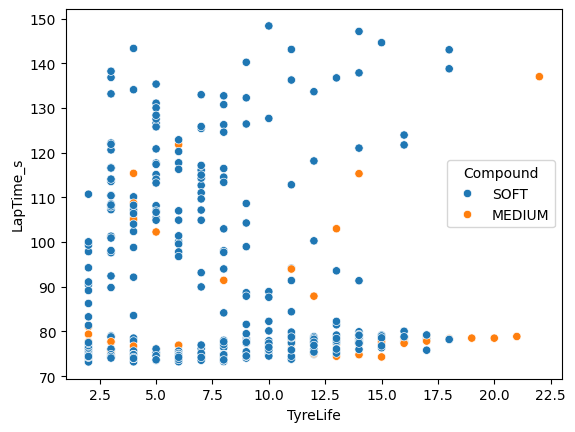

In [53]:
sns.scatterplot(data=clean_fp1, x="TyreLife", y="LapTime_s", hue="Compound")
plt.title("Lap Time vs. Tyre Life by Compound")

AttributeError: module 'matplotlib' has no attribute 'title'

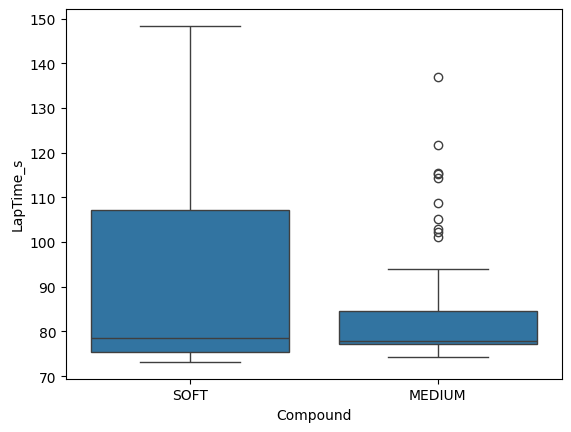

In [54]:
sns.boxplot(data=clean_fp1, x="Compound", y="LapTime_s")
plt.title("Lap Time Distribution by Compound")

AttributeError: module 'matplotlib' has no attribute 'title'

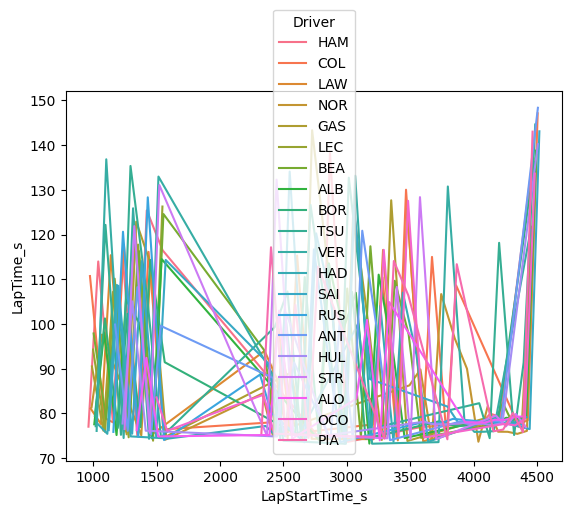

In [55]:
sns.lineplot(
    data=clean_fp1.sort_values("LapStartTime_s"),
    x="LapStartTime_s", y="LapTime_s", hue="Driver"
)
plt.title("Driver Pace Over Session Time")


AttributeError: module 'matplotlib' has no attribute 'title'

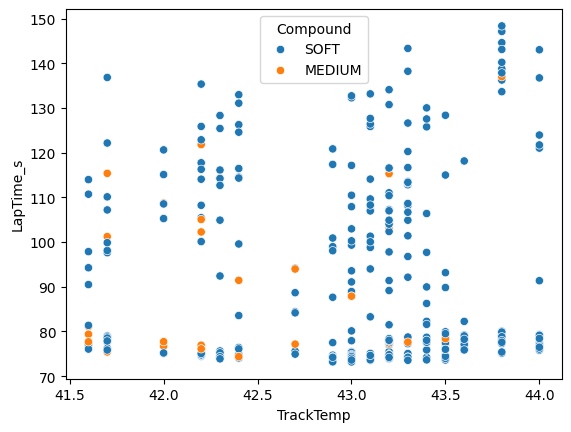

In [56]:
sns.scatterplot(data=clean_fp1, x="TrackTemp", y="LapTime_s", hue="Compound")
plt.title("Impact of Track Temperature on Lap Times")

AttributeError: module 'matplotlib' has no attribute 'title'

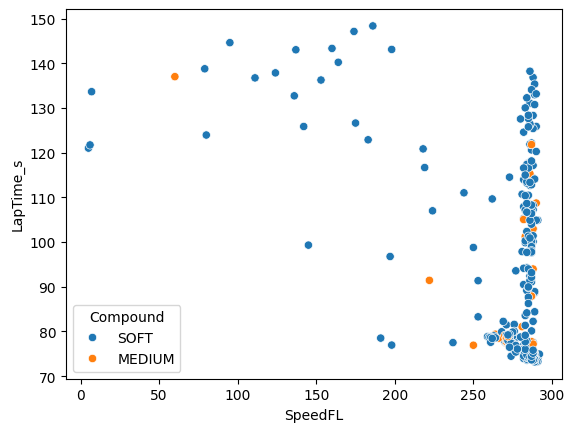

In [57]:
sns.scatterplot(data=clean_fp1, x="SpeedFL", y="LapTime_s", hue="Compound")
plt.title("Speed Trap vs. Lap Time")

AttributeError: module 'matplotlib' has no attribute 'title'

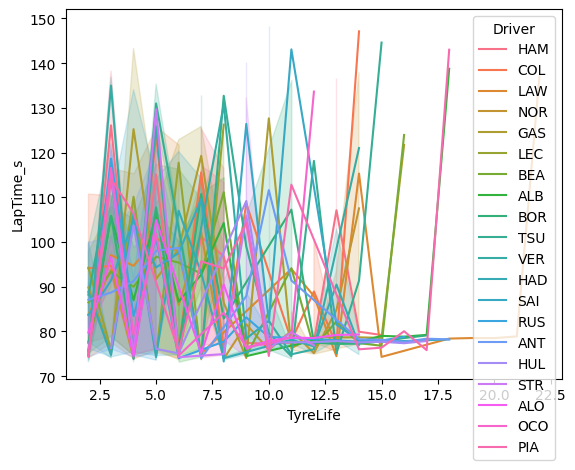

In [63]:
sns.lineplot(data=clean_fp1, x="TyreLife", y="LapTime_s", hue="Driver")
plt.title("Pace Degradation by Driver")

In [60]:
fastest = clean_fp1.sort_values("LapTime_s").groupby("Driver").first().reset_index()
fastest

,Driver,Stint,Compound,TyreLife,LapStartTime_s,LapTime_s,TrackTemp,TrackStatus,SpeedFL,SpeedI1,SpeedI2
0,ALB,2.0,SOFT,6.0,3177.733,73.232,42.9,1,289.0,259.0,284.0
1,ALO,3.0,SOFT,4.0,3259.838,73.972,43.2,1,282.0,254.0,279.0
2,ANT,3.0,SOFT,7.0,3340.225,74.002,43.1,1,287.0,258.0,281.0
3,BEA,3.0,SOFT,6.0,3303.178,74.520,43.2,1,285.0,257.0,278.0
4,BOR,2.0,SOFT,8.0,3148.360,74.324,42.9,1,285.0,256.0,282.0
5,COL,3.0,SOFT,4.0,3392.122,74.645,43.1,1,284.0,255.0,275.0
6,GAS,2.0,SOFT,11.0,3477.424,73.817,43.4,1,284.0,256.0,276.0
7,HAD,4.0,SOFT,8.0,3641.639,73.631,43.5,1,288.0,256.0,280.0
8,HAM,3.0,SOFT,4.0,3005.297,73.620,43.0,1,284.0,258.0,281.0
9,HUL,4.0,SOFT,3.0,2449.606,74.821,43.0,12,289.0,257.0,281.0


In [61]:
clean_fp1.groupby("Compound")["LapTime_s"].describe()

,count,mean,std,min,25%,50%,75%,max
Compound,,,,,,,,
MEDIUM,51.0,84.924863,14.924732,74.305,77.1915,77.772,84.4945,137.007
SOFT,327.0,91.391633,20.641186,73.193,75.4320,78.581,107.1775,148.354
